# Introduction to Data Visualization in Python

*Author: Sean Trott*

The goal of this tutorial is to familiarize you with the basics of data visualization in Python.

Note that the slides version can be found [here](https://seantrott.github.io/data_visualization_python/trott.slides.html), and the repository itself can be found [here](https://github.com/seantrott/data_visualization_python).

## What is data visualization?

[Data visualization](https://en.wikipedia.org/wiki/Data_visualization) refers to the process (and result) of representing data graphically.

For our purposes today, we'll be talking mostly about common methods of **plotting** data, including:

- Histograms  
- Scatterplots  
- Line plots
- Bar plots

## Why is data visualization important?

#### Exploratory data analysis

- **Checking assumptions**: does my data look like how I expect it to look?
- **Generating hypotheses**: what relationships can I discover in the data?

#### Communicating insights

- Given some insight, how can I communicate this **clearly**, **concisely**, and **accurately**?

#### Impacting the world

- Data visualizations can (and have) played a big role in shaping **policy**, **business decisions**, and more.

### Exploratory Data Analysis: Checking your assumptions 

[Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)

![title](img/anscombe.png)

### Communicating Insights

[Reference: Full Stack Economics](https://fullstackeconomics.com/18-charts-that-explain-the-american-economy/)

![title](img/work.png)

## Impacting the world

[Florence Nightingale](https://en.wikipedia.org/wiki/Florence_Nightingale) (1820-1910) was a social reformer, statistician, and founder of modern nursing.

![title](img/polar.jpeg)

## So how do we visualize data?

In today's tutorial, we'll discuss how to visualize data using **Python**.


## Key learning outcomes

- **Describe** the benefits and advantages of data visualization.
- **Propose** a suitable data visualization for a particular *dataset* and *question*.  
- **Implement** a first-draft of this visualization in Python, using either `matplotlib` or `seaborn`.  
- **Evaluate** this data visualization and make suggestions for improvements in future iterations.  
- **Reconstruct** a visualization found "in the wild" using the appropriate dataset.

## Loading packages

Here, we load the core packages we'll be using:

- [`pandas`](https://pandas.pydata.org/): a library for loading, reshaping, and joining `DataFrame` objects.  
- [`matplotlib`](https://matplotlib.org/): Python's core plotting/graphics library.  
- [`seaborn`](https://seaborn.pydata.org/): a library built on top of `matplotlib`, which makes certain plotting functions easier.  

We also add some lines of code that make sure our visualizations will plot "inline" with our code, and that they'll have nice, crisp quality.

In [1]:
import pandas as pd # conventionalized abbreviation
import matplotlib.pyplot as plt # conventionalized abbreviation
import seaborn as sns # conventionalized abbreviation

/Users/seantrott/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Part 1: Basic plot types with `matplotlib.pyplot`

In this section, we'll explore several basic plot types, first using `matplotlib.pyplot`. These will include:

- Histograms  
- Scatterplots  
- Barplots    

Afterwards (in Part 2), we will discuss how to replicate these plot types with `seaborn`, an API built on top of `pyplot`.

### Load dataset

To get started, we'll load a dataset from `seaborn`.

In [3]:
## Load taxis dataset
df_taxis = sns.load_dataset("taxis")
len(df_taxis)

6433

In [4]:
## What are the columns/variables in this dataset?
df_taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


### Histograms: plotting frequency distributions

**Histograms** are critical for visualizing how your data distribute.

They are typically used for **continuous**, **quantitative** variables. Examples could include: *height*, *income*, and *temperature*.

The `pyplot` package has a dedicated function for creating histograms, called `hist` (documentation [here](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.hist.html)). 

An example call would look like this:

```
plt.hist(
    x = [ ... ],
    bins = 10, # set number of bins
    density = False, # indicate whether to draw density plot
    alpha = True # indicate shading/transparency of plot
)
```

Now let's plot some of our variables from the `taxis` dataset!

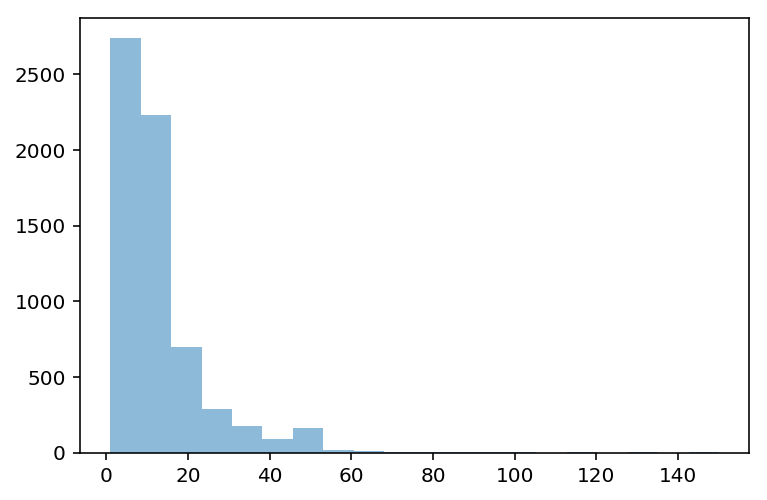

In [6]:
## Q: How would you describe the shape of this distribution?

plt.hist(
    x=df_taxis['fare'], # this is the variable we're plotting
    bins=20, # this is the number of bins we want to know
    alpha = .5 # this is our alpha level
)
plt.show()

We can also add axis labels, so it's clear what we're plotting.

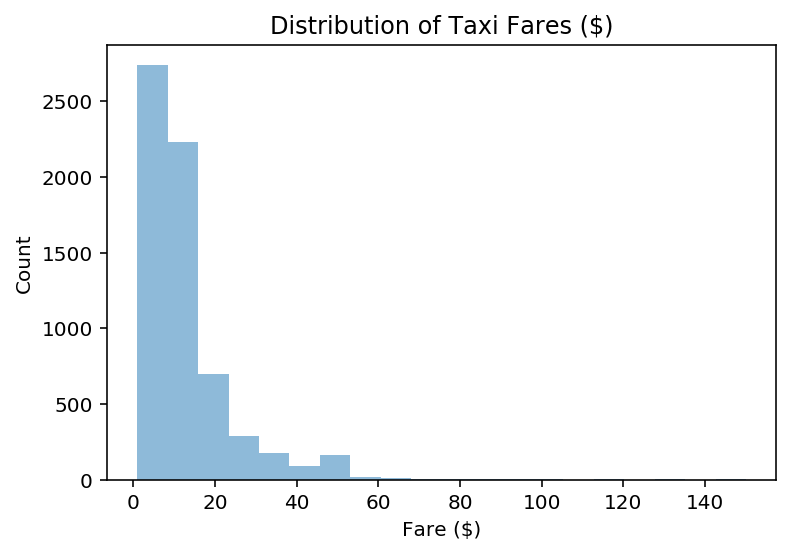

In [7]:
plt.hist(
    x=df_taxis['fare'], # this is the variable we're plotting
    bins=20, # this is the number of bins we want to know
    alpha = .5 # this is our alpha level
)
plt.xlabel("Fare ($)")
plt.ylabel("Count")
plt.title("Distribution of Taxi Fares ($)")
plt.show()

#### Q: How would you plot the distribution of trip distances?

In [5]:
### Fill in

#### Q: What about the distribution of tip amounts?

In [6]:
### Fill in

#### Q: What if we wanted to plot the distribution of tip *percentages*?

#### Creating a new variable

Presumably, these tip amounts *correlate* with the overall fare. We might also want to know about the amount in **percentage-terms**, e.g., how much a customer tipped as a percentage of how much the fare was.

In [7]:
## tip_pct = tip / fare
df_taxis['tip_pct'] = (df_taxis['tip'] / df_taxis['fare']) * 100

Now we can plot this new variable, to get a sense of the distribution of tip percentages.

**Q: What conclusions might we draw about the distribution of tip percentages here?**

In [8]:
### fill in

#### Q: Adding other markers to the plot?

What if we wanted to add more information to this plot, such as the **mean** tip percentage?

(Hint: use either `plt.axvline` or `plt.text`).

In [12]:
# First, calculate mean tip for ease of access
MEAN_TIP = df_taxis['tip_pct'].mean()

In [9]:
### Fill in

In [10]:
## Fill in

### Scatterplots: plotting multiple continuous variables

**Scatterplots** can be used to look at how two different continuous variables *relate* to each other.

Among other things, scatterplots are critical for exploratory data analysis––for example, if you want to run a linear regression on your dataset, it is important to determine that the relationship you're investigating is linear (remember [Anscombe's Quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)).

The `pyplot` package has a dedicated function for creating scatterplots as well, called `scatter` (documentation [here](https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.scatter.html)).

An example call would look like this:

```
plt.scatter(
    x = [ ... ], # array of values for x-axis
    y = [ ... ], # array of values for y-axis
    c = [ ... ], # array of values to indicate color of points
    alpha = True # indicate shading/transparency of plot
)
```

#### What to ask our data?

Intuitively, we might want to know a few things:

1. Do longer distances cost more?
2. Do people tip more (either in *amount* or *percentage* terms) for longer distances? 
3. Does it cost more to travel more between *boroughs*, even holding the distance constant?

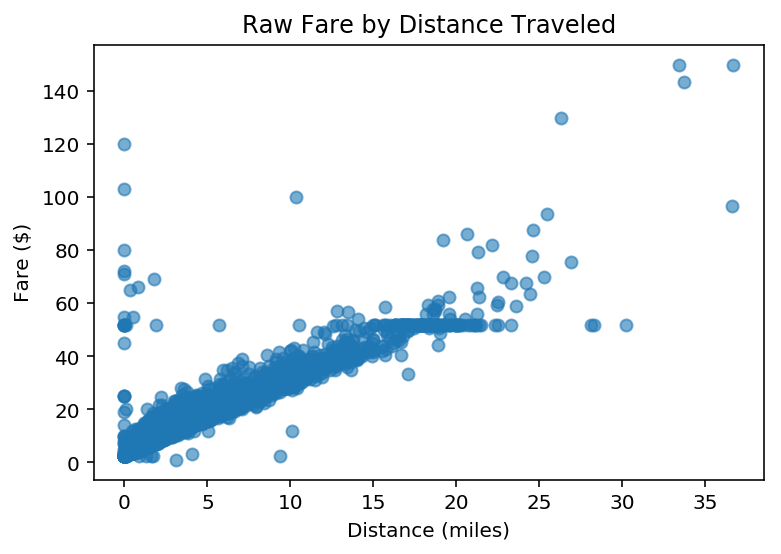

In [11]:
# Q: Do longer distances cost more?

plt.scatter(
    x = df_taxis['distance'],
    y = df_taxis['fare'],
    alpha = .6
)
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.title("Raw Fare by Distance Traveled")
plt.show()

#### Q: How could we ask about the relationship between distance and tip amount?

In [12]:
### Fill in

#### Q: What about distance and tip percentage?

In [13]:
### Fill in

#### Q: What about crossing between boroughs?

In [14]:
## Create a new variable
df_taxis['crossed_borough'] = df_taxis['pickup_borough'] != df_taxis['dropoff_borough']
df_taxis.head(1)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_pct,crossed_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.6,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,30.714286,False


#### Plotting categorical *and* continuous data

Now, we want to add more information to our scatterplot––we have a *categorical* variable (`crossed_borough`), and we want the color (or perhaps shape) of each point to indicate the level of that variable, i.e., whether the trip crossed between boroughs. 

In [15]:
### Fill in

### Barplots

Another commonly found type of plot is a **barplot**. 

Typically, barplots feature:

- On the x-axis, a **categorical** (i.e., nominal) variable.  
- On the y-axis, a **continuous** variable, usually summarized in some way (e.g., the means, with standard errors).

Barplots are effective for drawing attention to differences in the magnitude of some quantity across categories––though personally, I don't think they're always the most effective in terms of the amount of information conveyed per unit of space.

### Barplots in `pyplot`

The corresponding `pyplot` function is `bar`. We saw this earlier, when we were trying to plot the *counts* of a categorical variable.

The basic inputs are as follows:

```
plt.bar(
    x = [ ... ], # array of categories
    height = [ ... ] # height of each category
)

```

#### Q: What is the *mean* tip % for green vs. yellow taxis?

#### Creating a new dataframe using `groupby`

Once again, `groupby` is very helpful here. We'll want to:

1. Calculate the mean `tip_pct` for each level of the `color` variable.  
3. Plot this using `plt.bar`.  

In [16]:
df_color_tips_mean = df_taxis[['tip_pct', 'color']].groupby('color').mean().reset_index()
df_color_tips_mean

,color,tip_pct
0,green,7.441110
1,yellow,18.627966


Text(0.5, 1.0, 'Tip (%) by Taxi Color')

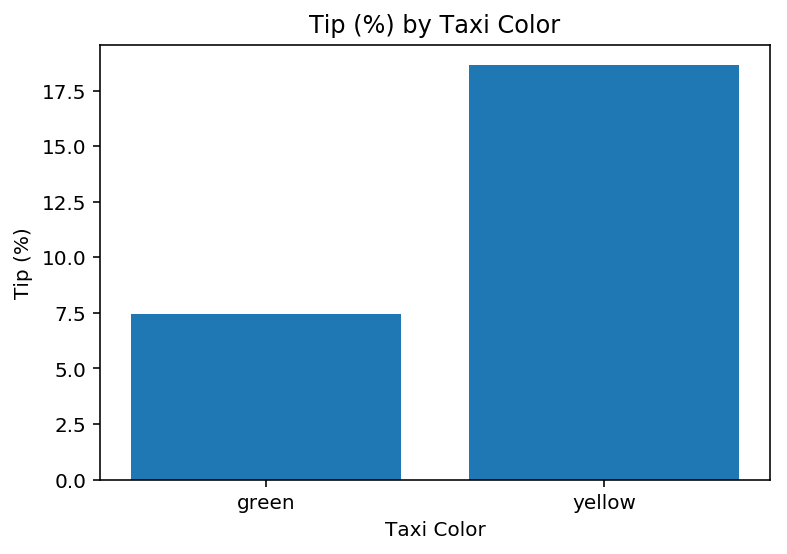

In [17]:
# Q: What's missing from this graph?

plt.bar(x = df_color_tips_mean['color'],
       height = df_color_tips_mean['tip_pct'])
plt.xlabel("Taxi Color")
plt.ylabel("Tip (%)")
plt.title("Tip (%) by Taxi Color")

#### Adding error bars

To add error bars, we can use `plt.errorbar`.

In [18]:
## First, calculate standard error of the mean
df_color_tips_sem = df_taxis[['tip_pct', 'color']].groupby('color').sem().reset_index()
df_color_tips_sem

,color,tip_pct
0,green,0.384112
1,yellow,0.194550


Text(0.5, 1.0, 'Tip (%) by Taxi Color')

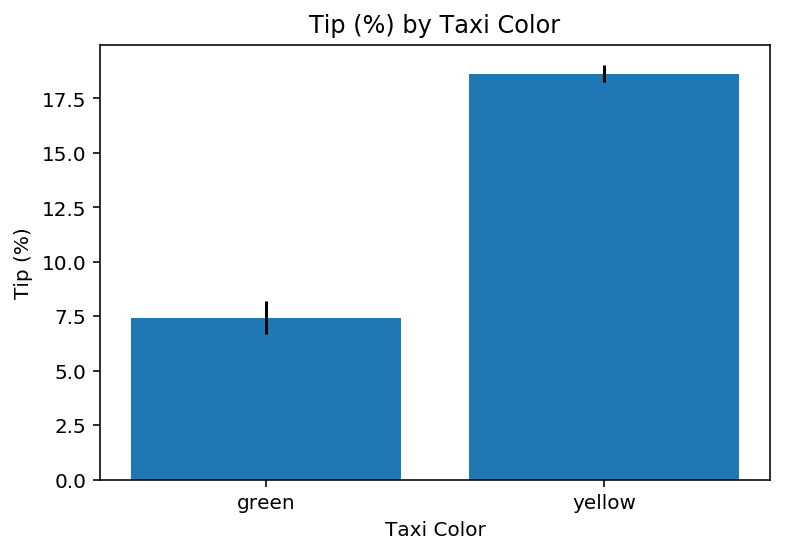

In [19]:
plt.bar(x = df_color_tips_mean['color'],
        height = df_color_tips_mean['tip_pct'])

plt.errorbar(x = df_color_tips_mean['color'], ## as with bar, the x-axis is the *color*
             y = df_color_tips_mean['tip_pct'], ## as with bar, the y-axis is the *mean*
             yerr = df_color_tips_sem['tip_pct'] * 2, ## two standard errors, as typical
             ls = 'none', ## toggle this to connect or not connect the lines
             color = "black")

plt.xlabel("Taxi Color")
plt.ylabel("Tip (%)")
plt.title("Tip (%) by Taxi Color")

### Other `pyplot` affordances

This short tutorial really only scratched the surface of what you can do with `pyplot`. 

Just to give a sense:

- [Add text to a plot with `pyplot.text`](https://matplotlib.org/stable/tutorials/text/text_intro.html)  
- [Create multiple subplots](https://matplotlib.org/stable/api/axes_api.html#subplots)  
- Create other types of plots, like [boxplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html) or lineplots. 



## Part 2: Plotting with `seaborn`

In this section, we'll replicate some of those same plots from above, but now using `seaborn`.

As you'll see, `seaborn` offers an API that's (in most cases) cleaner and easier to use than `pyplot`, though there's a trade-off in terms of flexibility.

### Histograms

Depending on your *version* of `seaborn`, you can plot a histogram using either:

- `seaborn.distplot`: typically used for creating **density plots**, but can be adapted for histograms.
- `seaborn.histplot`: targeted more specifically at histograms.

Text(0.5, 1.0, 'Distribution of miles traveled')

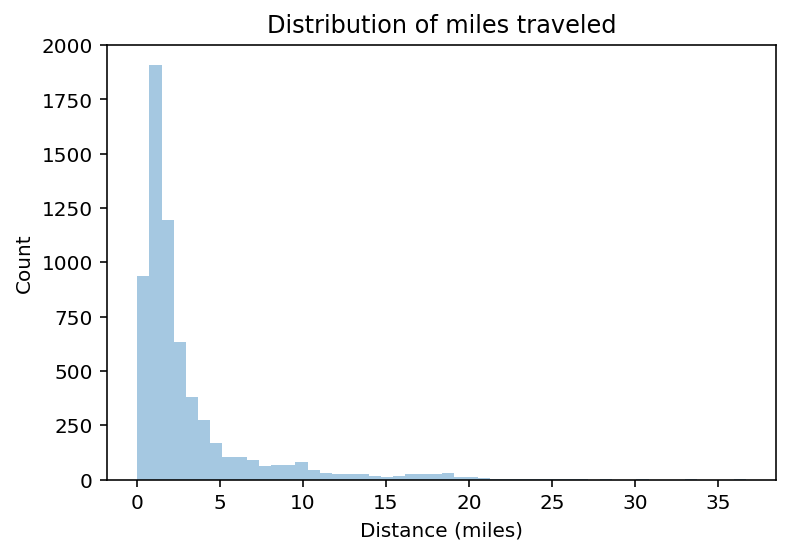

In [20]:
sns.distplot(df_taxis['distance'], ## vector to plot
             kde = False, ## whether to use kernel density estimation to fit density curve
             norm_hist = False ## whether to norm histogram to display probability vs. counts
            )
plt.xlabel("Distance (miles)")
plt.ylabel("Count")
plt.title("Distribution of miles traveled")

#### Q: Exercise for home––recreate the rest of the histograms from Part 1 using seaborn.

### Scatterplots

Fortunately, `seaborn` makes it *much* easier to create scatterplots, especially if you'd like to change the hue or style of the points.

```
sns.scatterplot(
    data = ..., # name of dataframe
    x = ..., # name of x-axis variable
    y = ..., # name of y-axis variable
    hue = ..., # name of hue variable
    style = ..., # name of style variable
    size = ..., # name of variable to modulate point size
)

```

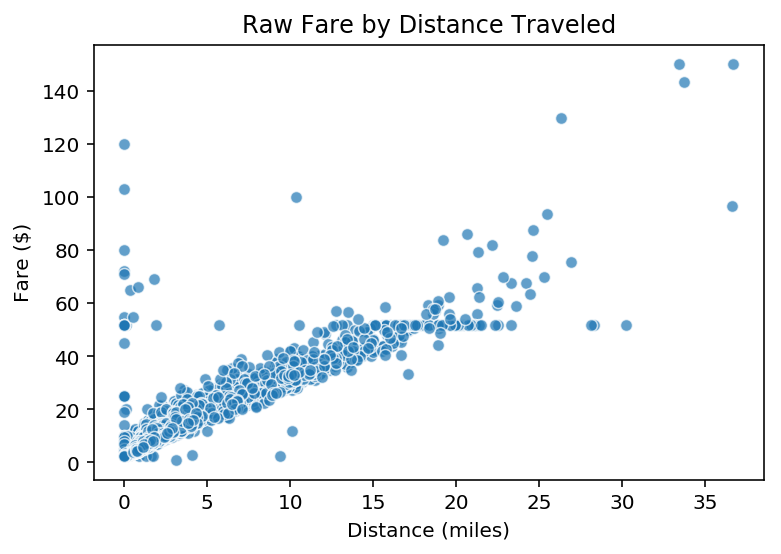

In [21]:
# Replicating our initial plot: Do longer distances cost more?

sns.scatterplot(data = df_taxis,
                x = "distance",
                y = "fare",
                alpha = .7)
plt.xlabel("Distance (miles)")
plt.ylabel("Fare ($)")
plt.title("Raw Fare by Distance Traveled")
plt.show()

#### Q: How would you create the same plot, but with the points colored to reflect whether a borough has been crossed?

In [22]:
### fill in

#### Q: Exercise for home––recreate the other scatterplots, or new ones, using seaborn.

### Bar plots

Finally, we can reconstruct some of the **bar plots** we created above, using the `barplot` function.

```
sns.barplot(
    data = ..., # name of dataframe
    x = ..., # name of x-axis variable (categorical)
    y = ..., # name of y-axis variable (continuous)
    hue = ..., # name of hue variable
    ci = float # size of confidence intervals to draw (these are estimated using *bootstrapping*, not SEM)
)
```

#### Q: How would we recreate the figure showing average tip % by taxi color?

Text(0.5, 1.0, 'Tip (%) by Taxi Color')

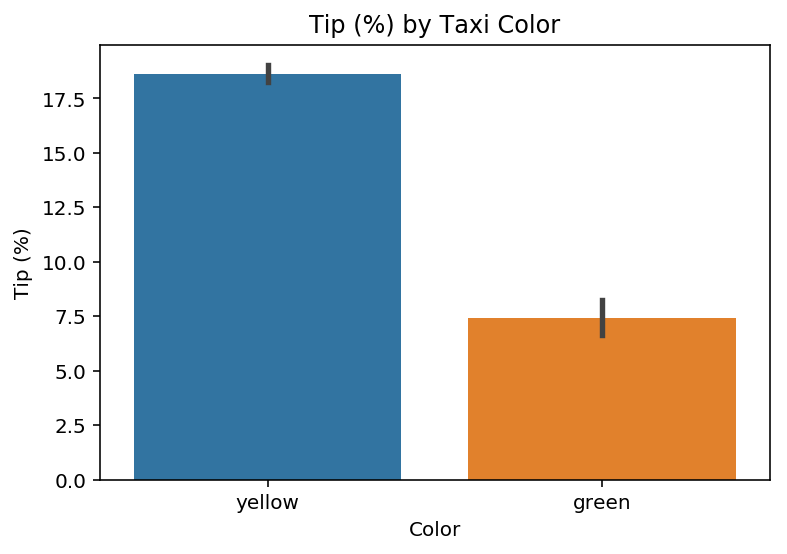

In [23]:
sns.barplot(data = df_taxis,
            x = "color",
            y = "tip_pct",
            ci = 95
           )

plt.xlabel("Color")
plt.ylabel("Tip (%)")
plt.title("Tip (%) by Taxi Color")

#### Q: What other variables would you be interested in looking at? Whether or not they're crossed a borough?

In [24]:
## Fill in

### Additional exercises with `taxis`

This dataset is quite rich, and you could ask a number of other questions.

Just to get you started:

1. Does `distance` traveled vary as a function of the **hour** of pickup?  
2. Is the `tip_pct` larger as a function of the **hour** of pickup?  
3. How does `distance` relate to the **amount of time** between `pickup` and `dropoff`?  
4. Do customers tip more when the trip takes longer (controlling for `distance`)? 

## Part 3: Reconstructing plots from "the wild" 

Data visualizations are increasingly common in blog posts, news articles, or even social media.

Reconstructing a visualization you find "in the wild" can reveal some of the hidden complexities of this process.

To that end, I reached out to Timothy Lee, author of a very interesting blog post found on [Full Stack Economics](https://fullstackeconomics.com/18-charts-that-explain-the-american-economy/), entitled "18 charts that explain the American economy". He was kind enough to give me the data he used to construct two of the charts included in that post: **chart #7** and **chart #14**.

In this reconstruction, let's focus on Chart 14.

### Chart 14: Reasons for missing work

This chart depicts the relative magnitudes of different causes for missing work, over time. For me, there are a couple takeaways:

1. Vacation time is highly seasonal, peaking each summer and creating an almost oscillatory pattern.  
2. Starting with 2020, vacation time drops a bit (though preserves the seasonal pattern), and we see a rise in missed work due to illness.

Let's try to reconstruct the chart from scratch!

Just for reference, the chart looks like this:

![title](img/work.png)

#### Load the data

First, we load and inspect the data. Here, we have to actually read in a `.csv` file using `pandas.read_csv`.

**Question**: What do you you all notice about the way this dataframe is structured?

In [25]:
df_missing = pd.read_csv("data/missing_work.csv")
len(df_missing)

110

In [26]:
# Inspecting the dataset
df_missing.head(5)

,Year,Child care problems,Maternity or paternity leave,Other family or personal obligations,Illness or injury,Vacation,Month
0,2012,18,313,246,899,1701,10
1,2012,35,278,230,880,1299,11
2,2012,13,245,246,944,1005,12
3,2013,14,257,250,1202,1552,1
4,2013,27,258,276,1079,1305,2


#### Converting to long format

#### Q: Any ideas on how to do this?

In [27]:
## Note: this is just one of the many approaches!

df_missing_long = pd.melt(df_missing, # dataframe
                          value_vars=['Child care problems', # which columns to stack into long format
                                      'Maternity or paternity leave',# which columns to stack into long format
                                      'Other family or personal obligations', # which columns to stack into long format
                                      'Illness or injury', # which columns to stack into long format
                                      'Vacation'], # which columns to stack into long format
                          id_vars=["Year", "Month"], # which columns to group/id them by
                          var_name = "Cause", # what to call the new grouping column
                          value_name = "Days" # what to call the new value column
                         )

In [28]:
df_missing_long.head(5)

,Year,Month,Cause,Days
0,2012,10,Child care problems,18
1,2012,11,Child care problems,35
2,2012,12,Child care problems,13
3,2013,1,Child care problems,14
4,2013,2,Child care problems,27


In [29]:
# Note: One other thing––the original graph aggregated data by the *millions*.
# This is already in the *thousands*, so we'll divide by another 1000 to match the origina. 
df_missing_long['Days_millions'] = df_missing_long['Days']/1000

#### Distribution over the year

Before we try to reconstruct the plot, let's first look at the distribution of missed days **across years**, to see if we can detect any patterns.

#### Q: What pattern should we conclude?

In [30]:
### Fill in

Text(0, 0.5, 'Days (Millions)')

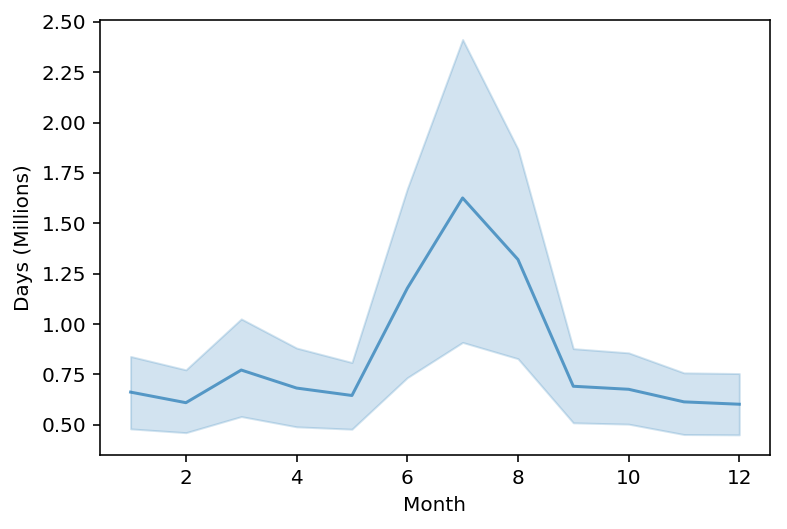

In [31]:
sns.lineplot(data = df_missing_long,
             x = 'Month',
             y = 'Days_millions',
             alpha = .7)

plt.xlabel("Month")
plt.ylabel("Days (Millions)")

#### Q (2): Why is there so much error in the summer months?

Text(0, 0.5, 'Days (Millions)')

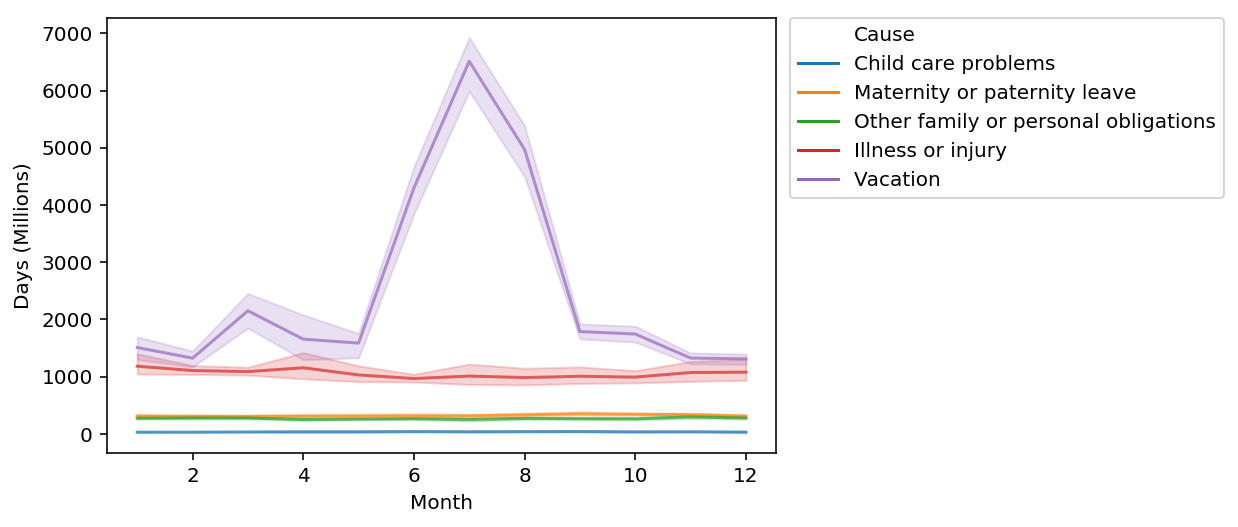

In [32]:
# This shows us that it's *vacation* specifically that has a seasonal pattern
sns.lineplot(data = df_missing_long,
             x = 'Month',
             y = 'Days',
             hue = 'Cause',
             alpha = .7)

# This makes sure the legend doesn't cover up the plot itself
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xlabel("Month")
plt.ylabel("Days (Millions)")

#### Reconstructing the original plot

Now, rather than averaging *across* years to get a picture of the "average year", let's just look at this over time.

One issue is that we'll first need to convert each observation (a `Month` and a `Year`) into a `datetime` object, so we can plug this into `pandas` and `seaborn` native `datetime` operations.

In [33]:
## First, let's concatenate each month and year into a single string
df_missing_long['date'] = df_missing_long.apply(lambda row: str(row['Month']) + '-' + str(row['Year']), axis = 1)
df_missing_long.head(5)

,Year,Month,Cause,Days,Days_millions,date
0,2012,10,Child care problems,18,0.018,10-2012
1,2012,11,Child care problems,35,0.035,11-2012
2,2012,12,Child care problems,13,0.013,12-2012
3,2013,1,Child care problems,14,0.014,1-2013
4,2013,2,Child care problems,27,0.027,2-2013


In [34]:
## Now, let's create a new "datetime" column using the `pd.to_datetime` function
df_missing_long['datetime'] = pd.to_datetime(df_missing_long['date'])
df_missing_long.head(5)

,Year,Month,Cause,Days,Days_millions,date,datetime
0,2012,10,Child care problems,18,0.018,10-2012,2012-10-01
1,2012,11,Child care problems,35,0.035,11-2012,2012-11-01
2,2012,12,Child care problems,13,0.013,12-2012,2012-12-01
3,2013,1,Child care problems,14,0.014,1-2013,2013-01-01
4,2013,2,Child care problems,27,0.027,2-2013,2013-02-01


#### Q: Now, how can we actually create the final plot?

In [35]:
### fill in

#### Bonus: Smoothing

If you look at the original plot carefully, you'll see that the observations have been *smoothed* using a rolling window average.

Fortunately, we can do the same thing using the `pandas.rolling` function.

In [45]:
## Construct a 3-month rolling average to "smooth" the data
df_missing_long['Days_rolling_avg'] = df_missing_long['Days_millions'].rolling(3).mean()

In [36]:
### fill in

In [37]:
## Discussion: Should we limit y-axis/causes to investigate trends in other causes, like child care problems?
## Q: How could we do this?

In [38]:
### fill in

## Part 4 (Bonus): Anscombe's Quartet

As discussed in the slides, one key motivation for making data visualizations is **exploratory data analysis** (EDA). Among other things, EDA can be used to ensure that the assumptions of a statistical test are met (e.g., that a relationship in our data is linear, if one is running linear regression).

### Load data

In [39]:
df_anscombe = sns.load_dataset("anscombe")
df_anscombe.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### Calculate correlation coefficient for each dataset

Just to make sure the central claim is correct, let's calculate Pearson's r for each dataset. Is it roughly the same in each?

In [40]:
from scipy.stats import pearsonr

corrs = []
for dataset in set(df_anscombe['dataset']):
    df_tmp = df_anscombe[df_anscombe['dataset']==dataset]
    r = round(pearsonr(df_tmp['x'], df_tmp['y'])[0], 4)
    corrs.append({
        'r': r,
        'dataset': dataset
    })

df_corrs = pd.DataFrame(corrs)
df_corrs

,r,dataset
0,0.8163,III
1,0.8162,II
2,0.8165,IV
3,0.8164,I


### Plot the data: a first (and flawed) approach

First, I'm going to plot the data just using `seaborn.scatterplot`.

Text(0, 0.5, 'Y')

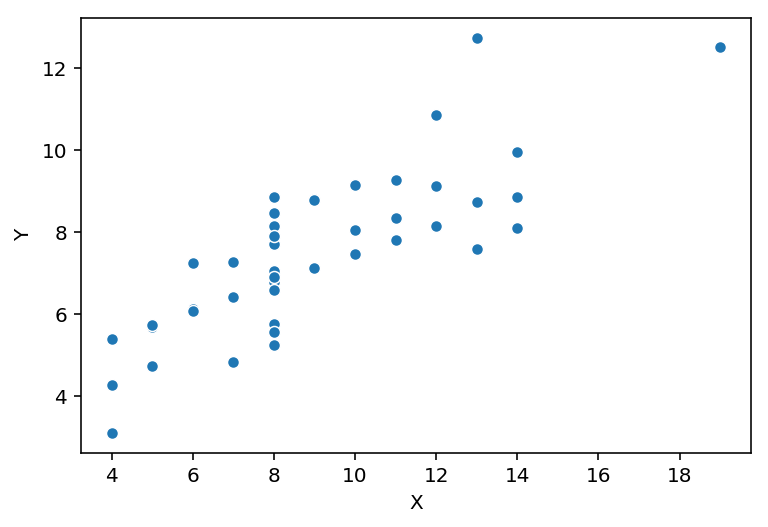

In [41]:
# Q: What's wrong with this approach?

sns.scatterplot(data = df_anscombe,
                x = 'x',
                y = 'y')

plt.xlabel("X")
plt.ylabel("Y")

### Plot the data using `FacetGrid`

The above plot **lumps** all the datasets together into the same plot. But we want to visualize them all *separately*.

For this, we can rely on `FacetGrid`.

#### Introducing `FacetGrid`

The `FacetGrid` object allows you to `map` a particular plot aesthetic (i.e., a particular `x/y` axis choice) onto multiple subplots, broken up by the levels of a categorical variable.

For example, you could create different subplots for `payment` type (`cash` vs. `credit card`), each showing the same relationship between `distance` and `fare`.

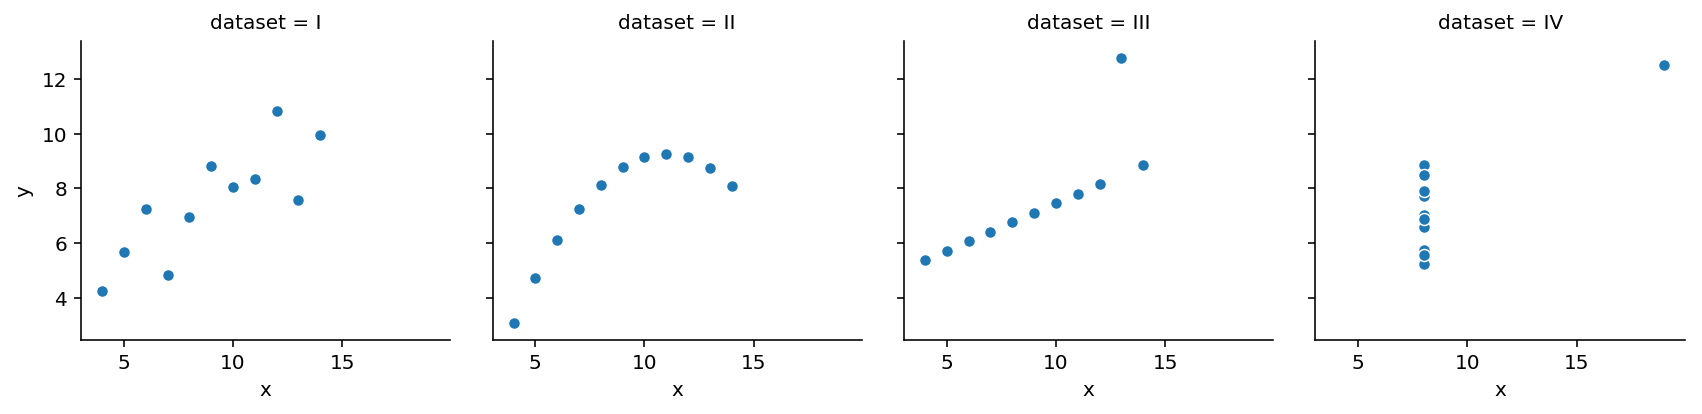

In [42]:
g = sns.FacetGrid(df_anscombe, col="dataset")
g.map(sns.scatterplot, "x", "y")

### Plot the data using `lmplot`

Another approach that allows us to `facet` the data is to use `lmplot`. 

The benefit of `lmplot` is that it will also plot a regression line over our data, which, in this case, clearly demonstrates that across each dataset, the estimated slope is roughly the same.

In [ ]:
sns.lmplot(data = df_anscombe,
           x = 'x',
           y = 'y',
           col = 'dataset')

## Conclusion

This concludes the tutorial! Hopefully, this has equipped you with some of the tools necessary to:

- **Describe** the benefits and advantages of data visualization.
- **Propose** a suitable data visualization for a particular *dataset* and *question*.  
- **Implement** a first-draft of this visualization in Python, using either `matplotlib` or `seaborn`.  
- **Evaluate** this data visualization and make suggestions for improvements in future iterations.  
- **Reconstruct** a visualization found "in the wild" using the appropriate dataset.

If you're interested in R, a tutorial on data visualization in R can be found [here](https://seantrott.github.io/data_wrangling_visualization/).